In [1]:
import pandas as pd
import numpy as np
from os import listdir

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
from pylab import cm

#from my_functions import find_min_distance

In [135]:
px_size = 0.1625
dt = 15 #frame interval in seconds

In [147]:
directory = 'Baz_Jupiter//'
title="Bazooka_ablation"
dt = 30 #frame interval in seconds

#directory = "C://Users//amilas//Desktop//Python-analysis//FRAP//Par1//"
#title="Par1_FRAP"

#directory = "C://Users//amilas//Desktop//Python-analysis//FRAP//Bazooka//"
#title="Bazooka_FRAP"


files = listdir(directory)

115
48
57
86
63
79
81
52
140
96
167
64


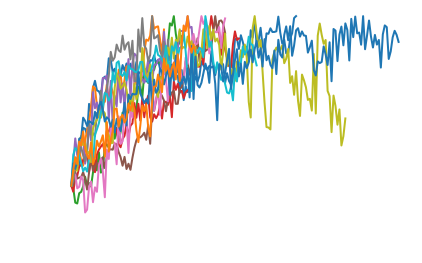

In [196]:

#COLOR = 'black'
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

# Make text editable in illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(5, 3))

# Add axes object to the figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=7, width=1, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=7, width=1, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')

# Add the x and y-axis labels
ax.set_xlabel('Time (s)', labelpad=10)
ax.set_ylabel('Normalized Intensity', labelpad=10)


intensities_all = pd.DataFrame()



for index, file in enumerate(files[0::2]):
    intensities = pd.read_csv(directory+file)
    background = pd.read_csv(directory+files[index*2+1])


    #subtract background
    intensities["Background_norm"] = intensities.Mean - background.Mean

    intensities["Mean"] = intensities.Background_norm

    #normalize
    if "ablation" in title: intensities["Normalized"] = intensities.Mean - intensities.Mean[0]
    else:
    #intensities["Normalized"] = intensities.Mean - intensities.Mean.min()
        intensities["Normalized"] = intensities.Mean - intensities.Mean[2]
    
    intensities[file] = intensities["Normalized"]/intensities["Normalized"].max()


    #final_intensities = intensities[intensities[intensities[file]==0].index.item():].reset_index()[file]
    
    final_intensities = intensities.reset_index()[file]

    print(len(intensities))
    if len(intensities)>0:
        intensities_all = pd.concat([intensities_all, final_intensities], axis=1)
        ax.plot(np.arange(len(final_intensities))*dt, final_intensities, linewidth=2)

intensities_all['Mean'] = intensities_all.mean(axis=1)
#ax.plot(np.arange(len(intensities_all.Mean))*dt, intensities_all.Mean, linewidth=5, color="black")



#ax.plot(xs, monoExp(xs, m, t), linewidth=5, color="black")


In [164]:
intensities

,,Mean,Min,Max,Median,Ch,Frame,Length,Background_norm
0,1,21.931,3016,3747,3333.5,1,95,103.874,21.931
1,2,26.706,3065,3782,3333.5,1,96,103.874,26.706
2,3,33.859,3037,3879,3345.0,1,97,103.874,33.859
3,4,35.097,3019,3841,3349.0,1,98,103.874,35.097
4,5,50.305,3088,3912,3361.0,1,99,103.571,50.305
5,6,41.569,3039,3902,3358.0,1,100,104.234,41.569
6,7,37.708,3077,3981,3363.0,1,101,103.571,37.708
7,8,57.245,3063,3902,3365.0,1,102,110.455,57.245
8,9,65.567,3024,4091,3382.0,1,103,110.455,65.567
9,10,71.187,3042,3915,3373.0,1,104,110.455,71.187


In [24]:
final_intensities

0     1.000000
1     0.986622
2     0.023055
3     0.015328
4     0.008463
        ...   
84    0.238409
85    0.215463
86    0.202735
87    0.215177
88    0.198582
Name: 20210419_Oocyte3.csv, Length: 89, dtype: float64

In [28]:

fig.savefig(f'{title}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}.png', dpi=300, transparent=True, bbox_inches='tight')

#fig.savefig(f'{title}.pdf', dpi=300, transparent=False, bbox_inches='tight')
#fig.savefig(f'{title}.png', dpi=300, transparent=False, bbox_inches='tight')

In [197]:
#par1_mean = intensities_all.Mean
#baz_mean = intensities_all.Mean
baz_mean_ablation = intensities_all.Mean

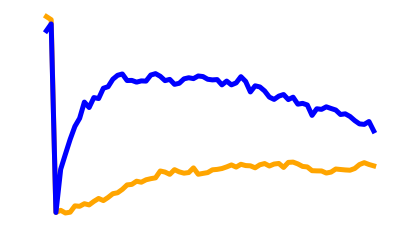

In [139]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(np.arange(70)*dt, baz_mean[0:70], linewidth=5, color="orange")
ax.plot(np.arange(70)*dt, par1_mean[0:70], linewidth=5, color="blue")


In [105]:
import scipy.optimize

def monoExp(x, m, t):
    return m * (1-np.exp(-t * x))

Text(0.5, 1.0, 'Original Data')

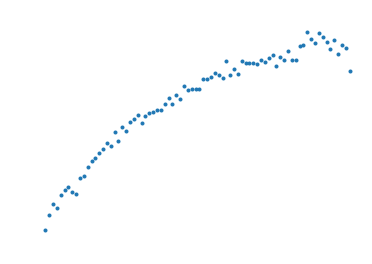

In [198]:
#xs = np.arange(34)*dt
#ys = par1_mean[2:36]


#xs = np.arange(68)*dt
#ys = baz_mean[2:70]


xs = np.arange(80)*dt
ys = baz_mean_ablation[0:80]

plt.plot(xs, ys, '.')
plt.title("Original Data")

In [89]:
baz_mean

0     0.987739
1     0.972270
2     0.000000
3     0.010861
4    -0.002585
        ...   
85    0.190794
86    0.202613
87    0.207603
88    0.207778
89    0.213826
Name: Mean, Length: 90, dtype: float64

R² = 0.9835012925963925
Y = 0.86378686989513 * (1-e^(-0.0011003381697921887 * x))
T_1/2 = 629.9401398488739


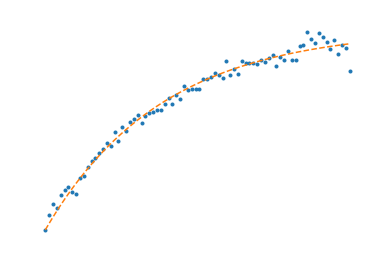

In [201]:
# perform the fit
#p0=[1,1]
p0 = [1, -np.log(0.5)/300]
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
m, t = params
t_half = np.log(0.5)/(-t)

# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, m, t))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(xs, ys, '.', label="data")
plt.plot(xs, monoExp(xs, m, t), '--', label="fitted")
plt.title("Fitted Exponential Curve")

# inspect the parameters
print(f"Y = {m} * (1-e^(-{t} * x))")
#print(f"Tau = {tauSec * 1e6} µs")
print(f"T_1/2 = {t_half}")